<a href="https://colab.research.google.com/github/sarigiri/Capstone_project_2/blob/master/Project_6_Recommendation%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics) ( 3 Marks)

In [4]:
ratings_data = pd.read_csv("ratings_Electronics.csv")  
ratings_data.head() 

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [5]:
# There are no column headings in this dataset
# Let's add column headers
# pass in column names for each CSV as the column name is not given in the file and read them using pandas.
# You can check the column names from the readme file

# reading users file:
cols = ['userId', 'productId', 'rating', 'timestamp']
ratings_data = pd.read_csv('ratings_Electronics.csv', sep=',', names=cols,encoding='latin-1')

ratings_data.columns.str.strip()


Index(['userId', 'productId', 'rating', 'timestamp'], dtype='object')

In [6]:
ratings_data.shape #Check for total data length and no of columns

(7824482, 4)

In [7]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [8]:
#Check if there are any duplicate records
sum(ratings_data.duplicated())

0

There are no duplicate records in the dataset

In [9]:
ratings_data.isnull().sum() # check if there are any missing values

userId       0
productId    0
rating       0
timestamp    0
dtype: int64

There are no missing values in this dataset

In [10]:
print('No. of Unique Users    :', ratings_data.userId.nunique())
print('No. of Unique Products :', ratings_data.productId.nunique())
print('No. of Unique Ratings  :', ratings_data.rating.nunique())

No. of Unique Users    : 4201696
No. of Unique Products : 476002
No. of Unique Ratings  : 5


In [11]:
ratings_data.describe()

,rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


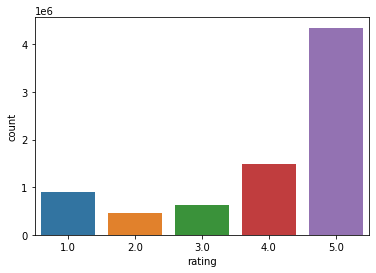

In [12]:
#plotting count of bookRating
sns.countplot(data=ratings_data , x='rating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 5 has been rated highest number of times

# 2. Take a subset of the dataset to make it less sparse/denser. ( For example, keep the users only who has given 50 or more number of ratings ) -(5 Marks)

In [13]:
ratings_data.reset_index(inplace=True)
ratings_data.drop(columns=['index'],inplace=True)
ratings_data.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [14]:
#Since the timestamp column is not needed, we can drop it
ratings_data.drop(columns='timestamp',inplace=True)

In [71]:
ratings_user_summary = ratings_data.groupby('userId')['rating'].agg(['count', 'mean', 'std'])
ratings_user_summary.head(10)

,count,mean,std
userId,,,
A00000262KYZUE4J55XGL,1,5.0,NaN
A000063614T1OE0BUSKUT,2,5.0,0.0
A00009182QVLSWIGHLS1B,1,5.0,NaN
A00009661LC9LQPGKJ24G,1,5.0,NaN
A00010809P09NUU6ZP6H,1,5.0,NaN
A00014061C2IZNE0YEILY,1,4.0,NaN
A000145014WOTZJ5NSKOR,1,5.0,NaN
A00015222LZ55IJSVL5IX,1,1.0,NaN
A00015228CUPGPF957DS,1,1.0,NaN


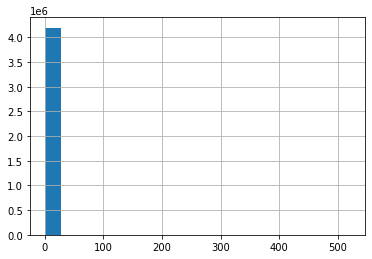

In [72]:
ratings_user_summary.sort_values(by='count')['count'].hist(bins=20)

In [73]:
ratings_product_summary = ratings_data.groupby('productId')['rating'].agg(['count', 'mean', 'std'])
ratings_product_summary.head(10)

,count,mean,std
productId,,,
0132793040,1,5.000000,NaN
0321732944,1,5.000000,NaN
0439886341,3,1.666667,1.154701
0511189877,6,4.500000,1.224745
0528881469,27,2.851852,1.680286
0558835155,1,3.000000,NaN
059400232X,3,5.000000,0.000000
0594012015,8,2.000000,1.851640
0594017343,1,1.000000,NaN


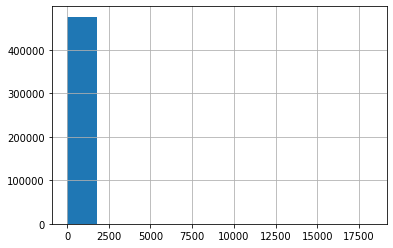

In [79]:
ratings_product_summary.sort_values(by='count')['count'].hist(bins=10)

In [19]:
# select subset as users who have given atleast >= 500 ratings
# using 500 because with colab 12GB RAM subset >=50 of users is crashing RAM while running KNNWithMeans item-item based model
df = ratings_data.groupby('userId').filter(lambda x : len(x) >= 500) 
df.head()

,userId,productId,rating
2162,A5JLAU2ARJ0BO,1400532655,1.0
5932,ADLVFFE4VBT8,9981719005,3.0
31765,ADLVFFE4VBT8,B00002NDRF,4.0
32736,A5JLAU2ARJ0BO,B00003006R,5.0
35087,A5JLAU2ARJ0BO,B00003G1RG,3.0


In [20]:
df.shape

(1021, 3)

In [21]:
df.describe()

,rating
count,1021.000000
mean,4.068560
std,1.261496
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000



# 3. Build Popularity Recommender model. ( 15 marks)
# 4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks)

In [22]:
train_data, test_data = train_test_split(df, test_size = 0.30, random_state=0)
print(train_data.head(5))

                userId   productId  rating
1574054   ADLVFFE4VBT8  B0011FQUUW     5.0
56089    A5JLAU2ARJ0BO  B00004VX3T     3.0
211142   A5JLAU2ARJ0BO  B000071NY3     5.0
163029   A5JLAU2ARJ0BO  B000068OJM     4.0
3550354   ADLVFFE4VBT8  B003TNMABW     5.0


In [23]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head()

,productId,score
0,1400532655,1
1,B00003006R,1
2,B00003G1RG,1
3,B00004SB92,1
4,B00004T1KZ,1


In [24]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,score,Rank
216,B0002CPBUK,2,1.0
331,B000M17AVO,2,2.0
420,B001P05NBA,2,3.0
433,B001V9LPT4,2,4.0
0,1400532655,1,5.0


 Use popularity based recommender model to make predictions and find recommendations for random list of users with inferences

In [25]:
# Use popularity based recommender model to make predictions
def recommend(userId):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = userId 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [26]:
find_recom = [15,121,53]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 15

     userId   productId  score  Rank
216      15  B0002CPBUK      2   1.0
331      15  B000M17AVO      2   2.0
420      15  B001P05NBA      2   3.0
433      15  B001V9LPT4      2   4.0
0        15  1400532655      1   5.0


Here is the recommendation for the userId: 121

     userId   productId  score  Rank
216     121  B0002CPBUK      2   1.0
331     121  B000M17AVO      2   2.0
420     121  B001P05NBA      2   3.0
433     121  B001V9LPT4      2   4.0
0       121  1400532655      1   5.0


Here is the recommendation for the userId: 53

     userId   productId  score  Rank
216      53  B0002CPBUK      2   1.0
331      53  B000M17AVO      2   2.0
420      53  B001P05NBA      2   3.0
433      53  B001V9LPT4      2   4.0
0        53  1400532655      1   5.0




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Since this is a popularity-based recommender model, recommendations remain the same for all users

We predict the products based on the popularity. It is not personalized to particular user

# 4. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio) ( 2 marks)

In [27]:
!pip install surprise # We will user Surprise API

     |████████████████████████████████| 6.5MB 2.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1670758 sha256=d18b0f4ee6713ba46490b99dc1742c5530f3c747c4524932d922753c37ac4ffa
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [66]:
# Import surprise library
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV

In [29]:
reader = Reader(rating_scale=(1, 5)) # Read the dataset
data_new = Dataset.load_from_df(df[['userId', 'productId', 'rating']], reader)
trainset, testset = train_test_split(data_new, test_size = 0.30, random_state=1) # split the data into 70/30 training and test set

# 5. Build Collaborative Filtering model. ( 20 marks)

In [48]:
# Import recommendation algorithms

from surprise import SVD, SVDpp, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore

# function to execute all algorithms to find best one based on RMSE
benchmark = []
def findBestAlgo(a,b,c,d,e,f):
    # Iterate over all algorithms
    for algorithm in [a,b,c,d,e,f]:
        # Perform cross validation
        if (algorithm != None):
          results = cross_validate(algorithm, data_new, cv=3, verbose=False)        
          # Get results & append algorithm name
          tmp = pd.DataFrame.from_dict(results).mean(axis=0)
          tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
          benchmark.append(tmp)       
    bd = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  
    return bd

In [49]:
bestModels = findBestAlgo(SVD(), SVDpp(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore()) 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [50]:
bestModels

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,1.242456,1.011709,0.043179,0.002190
SVDpp,1.242570,1.017808,2.736621,0.003913
KNNBaseline,1.243199,1.013678,0.002131,0.002086
KNNWithZScore,1.257621,0.991278,0.001536,0.001878
KNNBasic,1.259043,0.994381,0.000210,0.001986
KNNWithMeans,1.260122,0.996510,0.000326,0.001856


# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. ( 5 marks)

In [51]:
uid = str(15) # raw user id 
iid = str(121) # raw item id

In [52]:
# # Train and Predict: SVD algorithm that gave us the best rmse,mae and good fit and test time, 
# therefore we will train and predict with SVD and use RMSE

svdalgo = SVD()
svdalgo.fit(trainset)

svdpred = svdalgo.predict(uid, iid, verbose=True)
svdscore = svdpred.est
svdscore
# run the trained model against the testset
svdtest_pred = svdalgo.test(testset)

print(" SVD Predictions: \n",svdtest_pred)

#get RMSE
print("\nSVD : Test Set RMSE") 
svd_rmse = accuracy.rmse(svdtest_pred, verbose=True)
svd_rmse
#get MAE
print("\nSVD : Test Set MAE") 
svd_mae = accuracy.mae(svdtest_pred, verbose=True)
svd_mae

user: 15         item: 121        r_ui = None   est = 4.05   {'was_impossible': False}
 SVD Predictions: 
 [Prediction(uid='ADLVFFE4VBT8', iid='B000JMJWV2', r_ui=5.0, est=4.285110683093085, details={'was_impossible': False}), Prediction(uid='ADLVFFE4VBT8', iid='B002YL34A6', r_ui=4.0, est=4.285110683093085, details={'was_impossible': False}), Prediction(uid='ADLVFFE4VBT8', iid='B002PJVUFS', r_ui=4.0, est=4.285110683093085, details={'was_impossible': False}), Prediction(uid='ADLVFFE4VBT8', iid='B00B3PLPVO', r_ui=4.0, est=4.285110683093085, details={'was_impossible': False}), Prediction(uid='ADLVFFE4VBT8', iid='B000M2GYF6', r_ui=4.0, est=4.285110683093085, details={'was_impossible': False}), Prediction(uid='A5JLAU2ARJ0BO', iid='B000095SB4', r_ui=3.0, est=3.820626860285203, details={'was_impossible': False}), Prediction(uid='A5JLAU2ARJ0BO', iid='B00009LZMN', r_ui=1.0, est=3.820626860285203, details={'was_impossible': False}), Prediction(uid='A5JLAU2ARJ0BO', iid='B00008N6X4', r_ui=4.0, est=

1.0310890279186578

In [53]:
# Let's double check RMSE using KNNWithMeans for user based and item based filtering
# Use user_based true/false to switch between user-based or item-based collaborative filtering

knn_usermodel = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': True})
knn_usermodel.fit(trainset)

# get a prediction for specific users and items.
pred = knn_usermodel.predict(uid, iid, verbose=True)

# run the trained model against the testset
knnusertest_pred = knn_usermodel.test(testset)

# get RMSE
print("User-based Model : Test Set RMSE")
knnuser_rmse = accuracy.rmse(knnusertest_pred, verbose=True)
knnuser_rmse

# get MAE
print("User-based Model : Test Set MAE")
knnuser_mae = accuracy.mae(knnusertest_pred, verbose=True)
knnuser_mae

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
user: 15         item: 121        r_ui = None   est = 4.05   {'was_impossible': True, 'reason': 'User and/or item is unkown.'}
User-based Model : Test Set RMSE
RMSE: 1.2700
User-based Model : Test Set MAE
MAE:  1.0099


1.0098814770207758

In [54]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
knnitem_model = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
knnitem_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [55]:

# run the trained model against the testset
kmmitemtest_pred = knnitem_model.test(testset)

# get RMSE
print("Item-based Model : Test Set RMSE")
knnitem_rmse = accuracy.rmse(kmmitemtest_pred, verbose=True)
knnitem_rmse

# get MAE
print("Item-based Model : Test Set RMSE")
knnitem_mae = accuracy.mae(kmmitemtest_pred, verbose=True)
knnitem_mae

Item-based Model : Test Set RMSE
RMSE: 1.2706
Item-based Model : Test Set RMSE
MAE:  1.0099


1.0098814770207758

In [57]:
# Store various scores results for each kernel in a dataframe for final comparison

resultsDf = pd.DataFrame({'Model':['SVD'], 'RMSE': svd_rmse, 'MAE': svd_mae},index={'1'})
resultsDf = resultsDf[['Model','RMSE','MAE']]

tempResultsDf = pd.DataFrame({'Model':['KNNWithMeans UserBased'], 'RMSE': knnuser_rmse, 'MAE': knnuser_mae},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','RMSE','MAE']]

tempResultsDf = pd.DataFrame({'Model':['KNNWithMeans ItemBased'], 'RMSE': knnitem_rmse, 'MAE': knnitem_mae},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','RMSE','MAE']]

resultsDf

,Model,RMSE,MAE
1,SVD,1.251257,1.031089
2,KNNWithMeans UserBased,1.269978,1.009881
2,KNNWithMeans ItemBased,1.270602,1.009881


From the above results, it is observed that SVD has good RMSE score, so we will use it for further prediction

# 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. ( 10 marks)

In [58]:
#Convert result to DF

test_pred_df = pd.DataFrame(svdtest_pred)
test_pred_df

# Return a list of ratings that can be used as a testset in the test() method. 
# The ratings are all the ratings that are not in the trainset,
testset_new = trainset.build_anti_testset() 
len(testset_new)

testset_new[0:5]

[('A5JLAU2ARJ0BO', 'B0079R8KO0', 4.054621848739496),
 ('A5JLAU2ARJ0BO', 'B000Q8UAWY', 4.054621848739496),
 ('A5JLAU2ARJ0BO', 'B001HA51Z6', 4.054621848739496),
 ('A5JLAU2ARJ0BO', 'B00HLDFUM2', 4.054621848739496),
 ('A5JLAU2ARJ0BO', 'B0079MX4Q4', 4.054621848739496)]

In [59]:
# Find predictions using SVD algo with the testset
predictions = svdalgo.test(testset_new)

predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])
predictions_df.head()

predictions_df.columns = ["userId","productId","rating"]
predictions_df.sort_values(by = ["userId","productId","rating"],ascending=False,inplace=True)
predictions_df.head()


,userId,productId,rating
464,ADLVFFE4VBT8,B00GC1ZMYA,4.517208
622,ADLVFFE4VBT8,B00FR6VL50,4.616807
367,ADLVFFE4VBT8,B00FJRS5BA,4.250579
440,ADLVFFE4VBT8,B00EOE4G4E,3.913664
490,ADLVFFE4VBT8,B00D6KQ2GC,3.633521


In [60]:
# Representing top 5 Recommendations for each Customers by SVD

top_5_recos = predictions_df.groupby("userId").head().reset_index(drop=True)
top_5_recos

,userId,productId,rating
0,ADLVFFE4VBT8,B00GC1ZMYA,4.517208
1,ADLVFFE4VBT8,B00FR6VL50,4.616807
2,ADLVFFE4VBT8,B00FJRS5BA,4.250579
3,ADLVFFE4VBT8,B00EOE4G4E,3.913664
4,ADLVFFE4VBT8,B00D6KQ2GC,3.633521
5,A5JLAU2ARJ0BO,B00L3YHF6O,3.657221
6,A5JLAU2ARJ0BO,B00JX1ZS5O,4.272866
7,A5JLAU2ARJ0BO,B00JWXTOIA,4.428451
8,A5JLAU2ARJ0BO,B00JP7R7DC,3.851370
9,A5JLAU2ARJ0BO,B00JDAIMQ2,3.938457


from collections import defaultdict

def get_top_n(predictions, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions, n=5) # Representing top 5 Recommendations for each Customers by SVD

# Print the recommended items for each user selected as example earlier
for uid, user_ratings in top_n.items():
    print("\n ", uid, [iid for (iid, _) in user_ratings])

# 8. Insights




We used two collaborative filtering models for recommendations:

1) Memory based : User-item filtering and Item-item filtering (KNN)

2) Model based: Matrix Factorization based : orthogonal factorization (SVD) 

Also, we use popularity based model to find recommendations for users which are similar for all users.

As observed, collaborative filtering model gives different recommendations for each user as per their activities in terms of product ratings



In [75]:
# Parameter space
svd_param_grid = {'n_epochs': [20, 25], 
                  'lr_all': [0.007, 0.009, 0.01],
                  'reg_all': [0.4, 0.6]}

svdpp_gs = GridSearchCV(SVDpp, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svdpp_gs.fit(data_new)

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svd_gs.fit(data_new)

In [76]:
print('SVDpp - RMSE:', round(svdpp_gs.best_score['rmse'], 4), '; MAE:', round(svdpp_gs.best_score['mae'], 4))
print('SVD   - RMSE:', round(svd_gs.best_score['rmse'], 4), '; MAE:', round(svd_gs.best_score['mae'], 4))

SVDpp - RMSE: 1.2487 ; MAE: 0.9978
SVD   - RMSE: 1.2427 ; MAE: 0.9924


In [77]:
print('RMSE =', svdpp_gs.best_params['rmse'])
print('MAE =', svdpp_gs.best_params['mae'])
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])

RMSE = {'n_epochs': 25, 'lr_all': 0.007, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.009, 'reg_all': 0.4}
RMSE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.6}
